In [35]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./demo_r_mweek3_1_Data.csv')
data.head()


,TIME,GEO,UNIT,SEX,AGE,Value,Flag and Footnotes
0,2000W01,Belgium,Number,Total,Total,2.814,NaN
1,2000W01,Belgium,Number,Total,From 75 to 79 years,487,NaN
2,2000W01,Belgium,Number,Total,From 80 to 84 years,394,NaN
3,2000W01,Belgium,Number,Total,From 85 to 89 years,481,NaN
4,2000W01,Belgium,Number,Total,90 years or over,452,NaN


In [36]:

data['year']=data.TIME.apply(lambda x:x[0:4])
data['week']=data.TIME.apply(lambda x:x[-2:])
data = data.drop(columns = ['TIME', 'UNIT', 'SEX', 'AGE', 'Flag and Footnotes'])
data.week=data.week.astype(int)
data=data.loc[data.week<25]
data.Value = data.Value.apply(lambda x:x.replace('.',''))
data.Value = data.Value.apply(lambda x:x.replace(':','0'))
data.Value=data.Value.astype(int)
data.GEO=data.GEO.apply(lambda x:'Germany' if x[0:3]=='Ger' else x)
data

,GEO,Value,year,week
0,Belgium,2814,2000,1
1,Belgium,487,2000,1
2,Belgium,394,2000,1
3,Belgium,481,2000,1
4,Belgium,452,2000,1
...,...,...,...,...
160045,Serbia,0,2020,24
160046,Serbia,0,2020,24
160047,Serbia,0,2020,24
160048,Serbia,0,2020,24


In [37]:
data=data.groupby(['GEO','year','week']).sum().reset_index()
data

,GEO,year,week,Value
0,Austria,2000,1,3085
1,Austria,2000,2,3169
2,Austria,2000,3,3353
3,Austria,2000,4,3219
4,Austria,2000,5,3222
...,...,...,...,...
15115,United Kingdom,2020,20,27930
15116,United Kingdom,2020,21,23344
15117,United Kingdom,2020,22,19035
15118,United Kingdom,2020,23,20227


In [38]:
serie2020=data.loc[data.year=='2020']
data=data.loc[(data.year!='2020') & (data.Value>0)]
data=data.drop(columns=['year'])
data

,GEO,week,Value
0,Austria,1,3085
1,Austria,2,3169
2,Austria,3,3353
3,Austria,4,3219
4,Austria,5,3222
...,...,...,...
14587,Switzerland,20,2099
14588,Switzerland,21,2214
14589,Switzerland,22,2130
14590,Switzerland,23,2181


In [39]:
data=data.groupby(['GEO','week']).mean().reset_index()
data['year']='Mean 2000-2019'


In [40]:
data.GEO.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hungary',
       'Iceland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland'],
      dtype=object)

In [41]:
paises=['Belgium','Denmark','Finland','France','Germany','Spain','Italy',
        'Austria','Switzerland','Netherlands','Portugal','Sweden']
len(paises)

12

In [42]:
data=data.append(serie2020)

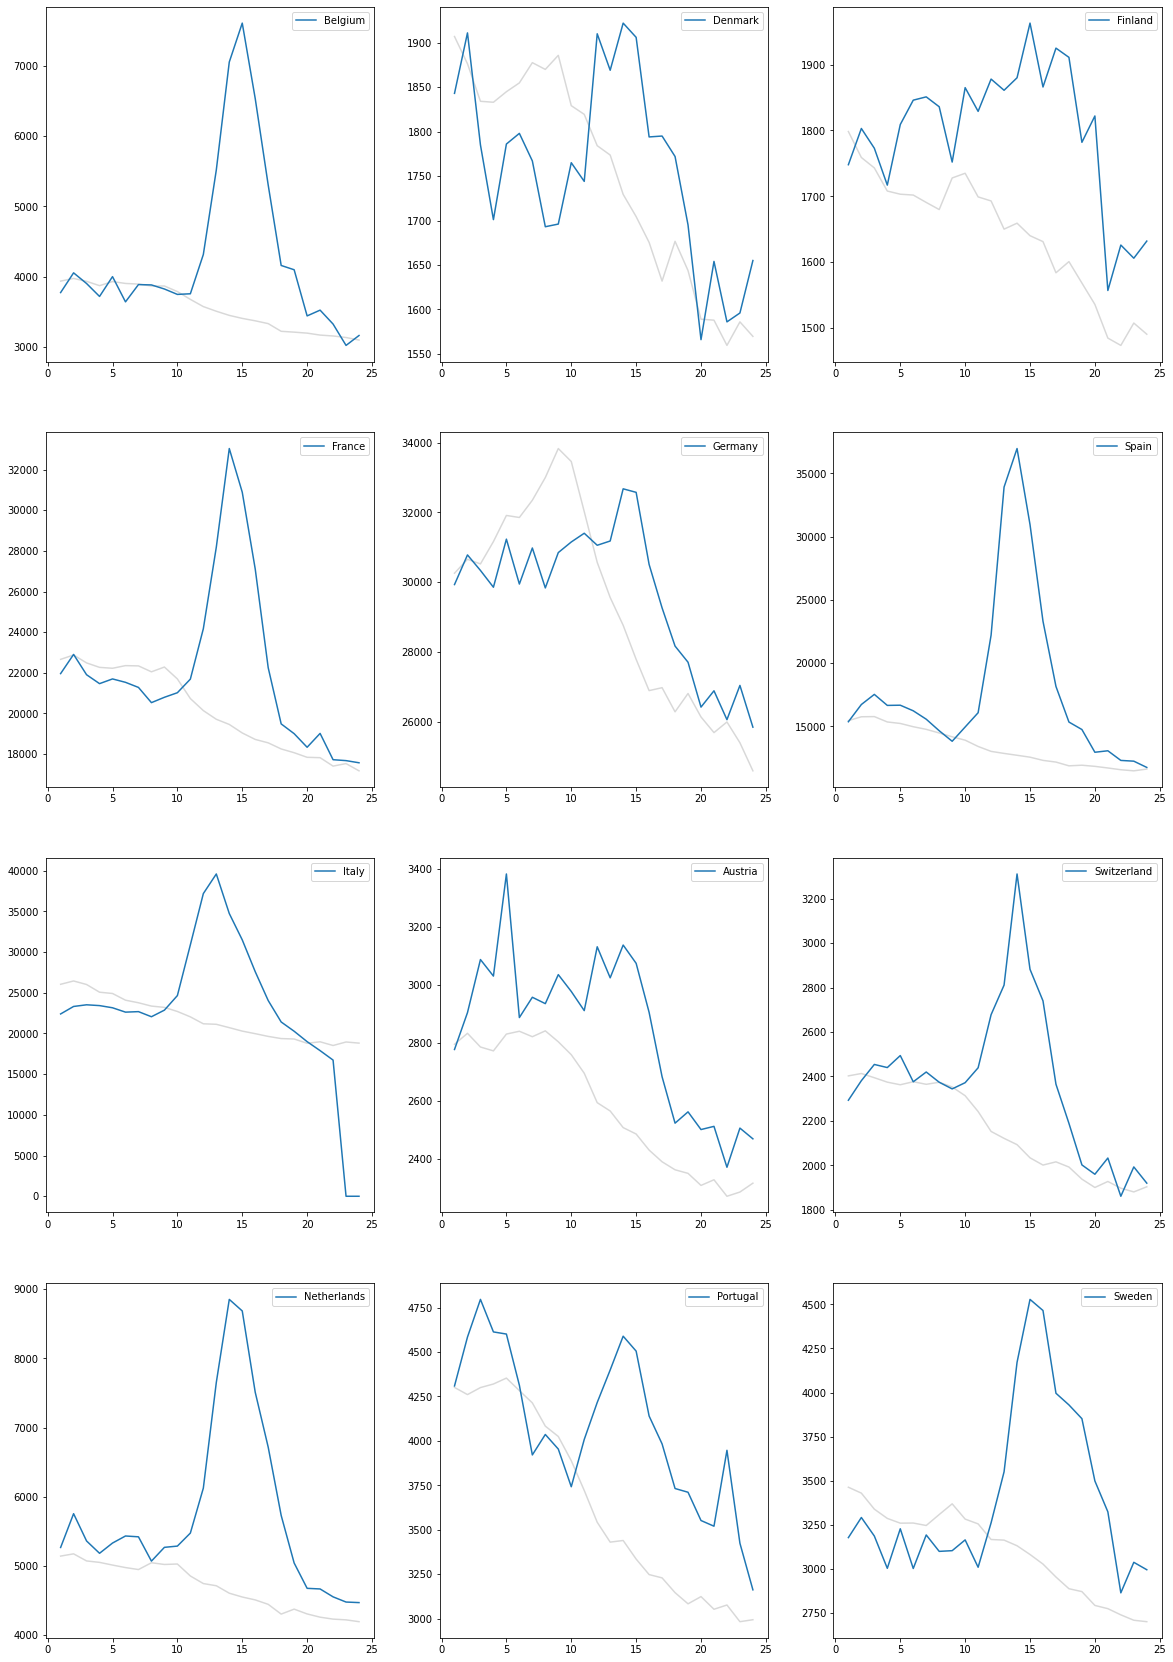

In [43]:
_,ax=plt.subplots(4,3,figsize=(20,30))
for i,pais in enumerate(paises):
    ax=plt.subplot(4,3,i+1)
    dataPaisMean=data.loc[(data.GEO==pais) & (data.year=='Mean 2000-2019')]
    dataPais2020=data.loc[(data.GEO==pais) & (data.year=='2020')]
    ax.plot(dataPaisMean.week,dataPaisMean.Value,'-',alpha=0.3,color='gray')
    ax.plot(dataPais2020.week,dataPais2020.Value,'-',label=pais)
    plt.legend()

In [44]:
exceso=[]
for pais in paises:
    dataPaisMean=data.loc[(data.GEO==pais) & (data.year=='Mean 2000-2019')]
    dataPais2020=data.loc[(data.GEO==pais) & (data.year=='2020')]
    ex=int(((dataPais2020.Value.sum()-dataPaisMean.Value.sum())/dataPaisMean.Value.sum())*100)
    exceso.append(ex)

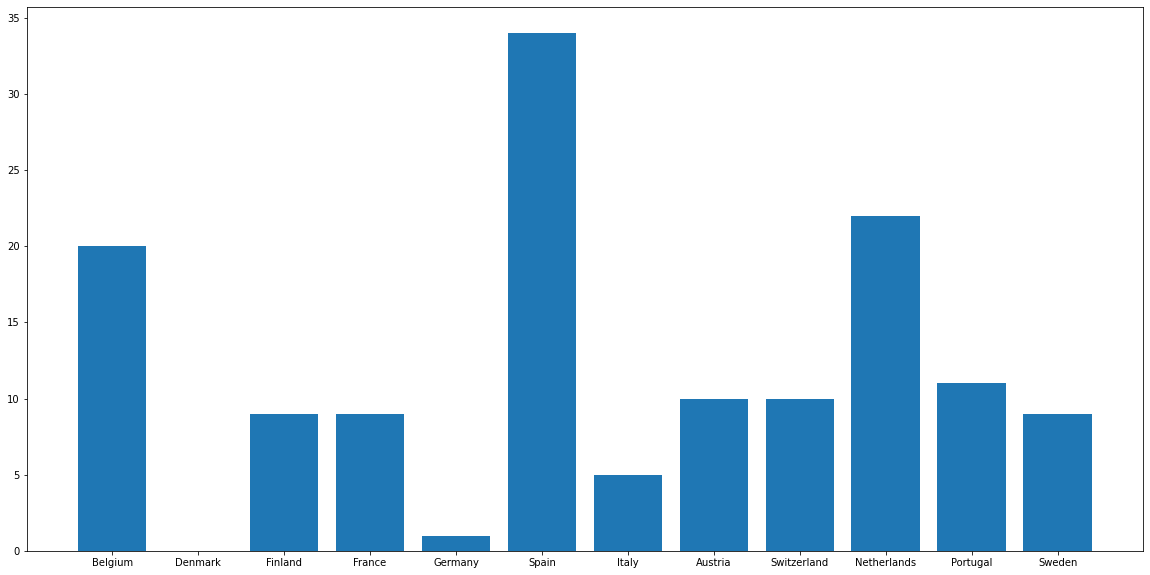

In [46]:
_,ax=plt.subplots(figsize=(20,10))
ax=plt.bar(paises,height=exceso)